In [3]:
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import discriminant_analysis
from sklearn import naive_bayes
from sklearn import metrics
from sklearn import neighbors
from sklearn import feature_selection
import sklearn.datasets
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm


11. We will now try to predict per capita crime rate in the Boston data set.

In [4]:
df = pd.read_csv('~/documents/datascience/ISLR/book_content/data/Boston.csv', index_col=0)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


(a) Try out some of the regression methods explored in this chapter,
such as best subset selection, the lasso, ridge regression, and
PCR. Present and discuss results for the approaches that you
consider.

# Linear

In [15]:
#Sequential Feature Selector - does do cross-validation.
#Model

X = df.drop(['crim'], axis=1)
y = df['crim']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
fs = feature_selection.SelectFromModel(linear_model.LinearRegression()).fit(X,y)
fs
#clf = Pipeline([
#  
#  ('feature_selection', feature_selection.SelectFromModel(LinearModel())),
#  ('linear_model', LinearModel())
#])
feature_selection


#list_fwd = []

<module 'sklearn.feature_selection' from '/home/zacharygibbs/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/feature_selection/__init__.py'>

In [18]:
fs.get_feature_names_out()

array(['nox'], dtype=object)

In [325]:
bwd_res = []
for i in list_bwd:
    X = df.drop(['crim'], axis=1)[i]
    y = df['crim']
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
    sc = preprocessing.StandardScaler()
    XStd = sc.fit_transform(X)
    X_trainStd = sc.transform(X_train)
    X_testStd = sc.transform(X_test)
    lm = linear_model.LinearRegression().fit(XStd, y)
    bwd_res.append(np.mean((lm.predict(X_testStd) - y_test)**2))
    
fwd_res = []
for i in list_fwd:
    X = df.drop(['crim'], axis=1)[i]
    y = df['crim']
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
    sc = preprocessing.StandardScaler()
    XStd = sc.fit_transform(X)
    X_trainStd = sc.transform(X_train)
    X_testStd = sc.transform(X_test)
    lm = linear_model.LinearRegression().fit(XStd, y)
    fwd_res.append(np.mean((lm.predict(X_testStd) - y_test)**2))

['rad'] 29.69721747614428
['zn' 'rad'] 29.696450395439815
['zn' 'rad' 'lstat'] 23.53827913972547
['zn' 'chas' 'rad' 'lstat'] 23.622904541018833
['zn' 'chas' 'nox' 'rad' 'lstat'] 23.610520659781415
['zn' 'chas' 'nox' 'dis' 'rad' 'lstat'] 23.383884292210812
['zn' 'chas' 'nox' 'rm' 'dis' 'rad' 'lstat'] 23.39548571088264
['zn' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'lstat'] 23.303260731875785
['zn' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'lstat'] 23.13006713013437
['zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'lstat'] 22.8524382606039
['zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio' 'lstat'] 22.85419358742065


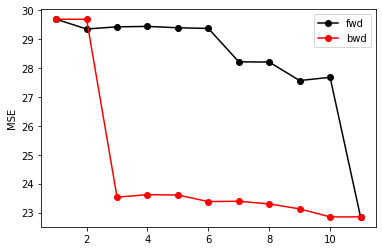

In [326]:
plt.figure(1)
plt.plot(np.arange(1, len(fwd_res)+1, 1), fwd_res, 'ko-', label='fwd')
plt.plot(np.arange(1, len(fwd_res)+1, 1), bwd_res, 'ro-', label='bwd')
plt.legend()
plt.ylabel('MSE')
#appears to me that a 6 variable model will work just fine for ridge 
#print(list_bwd[5])
#print(list_bwd[9])
for i, j in zip(list_bwd, bwd_res):
    print(i,j)

## Ridge

In [103]:
alphas = np.logspace(-6, 6, num=100)
ridge = linear_model.Ridge(alpha=12, random_state=3)
#cv = model_selection.KFold(n_splits = 20)
scores = model_selection.cross_val_score(ridge, XStd, y, scoring='neg_mean_squared_error',
                         cv=5, n_jobs=-1)
scores

array([  -3.71950089,   -8.12569054,   -3.67491012,  -87.05014288,
       -126.45941204])

In [328]:
list_fwd = []
list_bwd = []
X = df.drop(['crim'], axis=1)
XStd = sc.fit_transform(X)
for i in range(len(X.columns)):

    n_features_to_select = i + 1
    ridge = linear_model.RidgeCV(
                                 alphas=alphas,
                                 store_cv_values=True,
                                 alpha_per_target=True
                                )

    feature_names = np.array(X.columns)
    sfs_forward = feature_selection.SequentialFeatureSelector(
        ridge, n_features_to_select=n_features_to_select, direction="forward"
    ).fit(XStd, y)

    sfs_backward = feature_selection.SequentialFeatureSelector(
        ridge, n_features_to_select=n_features_to_select, direction="backward"
    ).fit(XStd, y)

    print(
        "Features selected by forward sequential selection: "
        f"{feature_names[sfs_forward.get_support()]}"
    )
    print(
        "Features selected by backward sequential selection: "
        f"{feature_names[sfs_backward.get_support()]}"
    )
    list_fwd.append(feature_names[sfs_forward.get_support()])
    list_bwd.append(feature_names[sfs_backward.get_support()])

Features selected by forward sequential selection: ['rad']
Features selected by backward sequential selection: ['rad']
Features selected by forward sequential selection: ['nox' 'rad']
Features selected by backward sequential selection: ['rm' 'rad']
Features selected by forward sequential selection: ['indus' 'nox' 'rad']
Features selected by backward sequential selection: ['rm' 'dis' 'rad']
Features selected by forward sequential selection: ['indus' 'nox' 'rad' 'tax']
Features selected by backward sequential selection: ['zn' 'rm' 'dis' 'rad']
Features selected by forward sequential selection: ['zn' 'indus' 'nox' 'rad' 'tax']
Features selected by backward sequential selection: ['zn' 'rm' 'dis' 'rad' 'lstat']
Features selected by forward sequential selection: ['zn' 'indus' 'nox' 'rad' 'tax' 'ptratio']
Features selected by backward sequential selection: ['zn' 'chas' 'rm' 'dis' 'rad' 'lstat']
Features selected by forward sequential selection: ['zn' 'indus' 'nox' 'rm' 'rad' 'tax' 'ptratio']


ValueError: n_features_to_select must be either None, an integer in [1, n_features - 1] representing the absolute number of features, or a float in (0, 1] representing a percentage of features to select. Got 12

In [329]:
bwd_res = []
for i in list_bwd:
    X = df.drop(['crim'], axis=1)[i]
    y = df['crim']
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
    sc = preprocessing.StandardScaler()
    XStd = sc.fit_transform(X)
    X_trainStd = sc.transform(X_train)
    X_testStd = sc.transform(X_test)
    alphas = np.logspace(-1, 1.3, num=100)
    ridge = linear_model.RidgeCV(
                                 alphas=alphas,
                                 store_cv_values=True,
                                 alpha_per_target=True
                                ).fit(XStd, y)
    bwd_res.append(np.mean((ridge.predict(X_testStd) - y_test)**2))
    
fwd_res = []
for i in list_fwd:
    X = df.drop(['crim'], axis=1)[i]
    y = df['crim']
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
    sc = preprocessing.StandardScaler()
    XStd = sc.fit_transform(X)
    X_trainStd = sc.transform(X_train)
    X_testStd = sc.transform(X_test)
    alphas = np.logspace(-1, 1.3, num=100)
    ridge = linear_model.RidgeCV(
                                 alphas=alphas,
                                 store_cv_values=True,
                                 alpha_per_target=True
                                ).fit(XStd, y)
    fwd_res.append(np.mean((ridge.predict(X_testStd) - y_test)**2))

['rad'] 29.645078626323816
['rm' 'rad'] 28.5207985652776
['rm' 'dis' 'rad'] 28.222842434482505
['zn' 'rm' 'dis' 'rad'] 27.56860238428119
['zn' 'rm' 'dis' 'rad' 'lstat'] 23.371994149915338
['zn' 'chas' 'rm' 'dis' 'rad' 'lstat'] 23.478995912399807
['zn' 'chas' 'nox' 'rm' 'dis' 'rad' 'lstat'] 23.326886606962802
['zn' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'lstat'] 23.257215846518495
['zn' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'lstat'] 23.16008013258261
['zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'lstat'] 22.870406948214466
['zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio' 'lstat'] 22.86289978919747


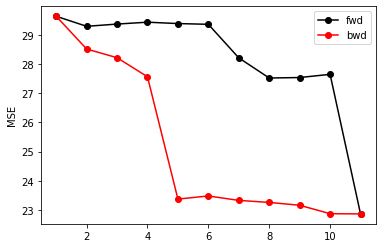

In [330]:
plt.figure(1)
plt.plot(np.arange(1, len(fwd_res)+1, 1), fwd_res, 'ko-', label='fwd')
plt.plot(np.arange(1, len(fwd_res)+1, 1), bwd_res, 'ro-', label='bwd')
plt.legend()
plt.ylabel('MSE')
#appears to me that a 6 variable model will work just fine for ridge 
for i, j in zip(list_bwd, bwd_res):
    print(i,j)


23.16008013258261
3.6021820400508573
-43.11569060034128


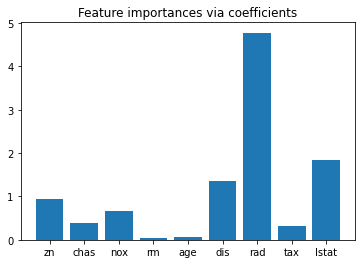

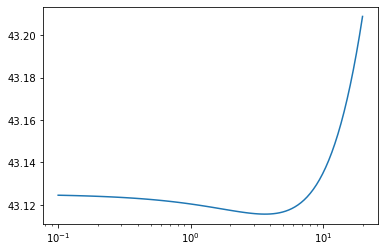

In [317]:
X = df.drop(['crim'], axis=1)[list_bwd[8]]
y = df['crim']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
sc = preprocessing.StandardScaler()
XStd = sc.fit_transform(X)
X_trainStd = sc.transform(X_train)
X_testStd = sc.transform(X_test)

alphas = np.logspace(-1, 1.3, num=100)
ridge = linear_model.RidgeCV(
                             alphas=alphas,
                             store_cv_values=True,
                             alpha_per_target=True
                            ).fit(XStd, y)
print(np.mean((ridge.predict(X_testStd) - y_test)**2))
print(ridge.alpha_)
print(ridge.best_score_)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)

plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")

plt.figure(2)
plt.semilogx(alphas, np.mean(ridge.cv_values_,axis=0))

In [271]:
np.mean((ridge.predict(X_testStd) - y_test)**2)

22.86289978919747

(b) Propose a model (or set of models) that seem to perform well on
this data set, and justify your answer. Make sure that you are
evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to
using training error.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
..........................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
..........................................................................................................[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Text(0.5, 1.0, 'Feature importances via coefficients')

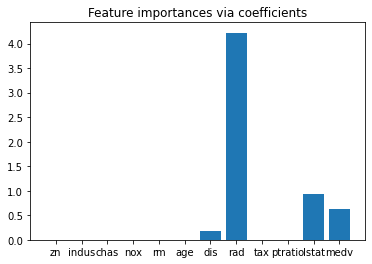

In [207]:
alphas = np.logspace(-1, 3, num=100)
lasso = linear_model.LassoCV(
    alphas=alphas,
    verbose=True, n_jobs=-1
                            ).fit(XStd, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(X.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")

#plt.figure(2)
#plt.semilogx(alphas, np.mean(lasso.cv_values_,axis=0))

In [208]:
print(lasso.alpha_)
print(np.mean((lasso.predict(X_testStd) - y_test)**2))

0.36783797718286343
25.021909253246104


In [371]:
pls.predict(X_test)

array([[ 2.40755886],
       [-2.23846179],
       [ 7.97316868],
       [-1.43782514],
       [10.74225829],
       [ 2.32652072],
       [ 3.47493049],
       [ 6.68019349],
       [ 8.68018219],
       [ 4.59413906],
       [ 3.69486211],
       [ 2.24141174],
       [14.51402922],
       [ 1.53388157],
       [ 1.97844514],
       [ 8.29386863],
       [ 3.55369934],
       [13.59970327],
       [-4.08103447],
       [11.12388875],
       [-1.63547154],
       [-1.31089451],
       [ 4.28142143],
       [ 1.74226058],
       [11.02306726],
       [10.52093642],
       [ 1.10755248],
       [10.67454793],
       [ 2.63981747],
       [ 4.33457544],
       [ 3.72267585],
       [ 0.51663708],
       [ 9.91011332],
       [11.03851633],
       [10.50597718],
       [ 7.69675499],
       [-1.19801469],
       [ 0.46160094],
       [ 1.30596588],
       [-1.33793397],
       [ 5.52251595],
       [ 0.3318205 ],
       [-4.53392656],
       [ 0.08925837],
       [ 0.98200761],
       [11

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

X = df.drop(['crim'], axis=1)[list_bwd[8]]
y = df['crim']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

pcr_list = []
pls_list = []
for n_component in np.arange(1, 10):
    print(n_component)
    pcr = make_pipeline(StandardScaler(), PCA(n_components=n_component), LinearRegression())
    pcr.fit(X_train, y_train)
    #print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
#print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")
    pcr_list.append(np.mean((y_test - pcr.predict(X_test))**2))
    pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline



    pls = PLSRegression(n_components=n_component)
    pls.fit(X_train, y_train)
    print(pls.predict(X_test).shape)
    pls_list.append(np.mean((y_test - np.ravel(pls.predict(X_test)))**2))





1
(102, 1)
2
(102, 1)
3
(102, 1)
4
(102, 1)
5
(102, 1)
6
(102, 1)
7
(102, 1)
8
(102, 1)
9
(102, 1)


29.83099279748429 32.580199910889505
27.420446960997303 30.58859575633192
26.97130142250501 27.75500805577393
25.51362909710855 28.336673082342877
24.973515398130875 28.54652368548647
25.371687416036668 27.53370687223086
25.34913621886982 27.828241486708446
25.25421684228832 26.794984915547587
25.26178930780844 25.26178930780845


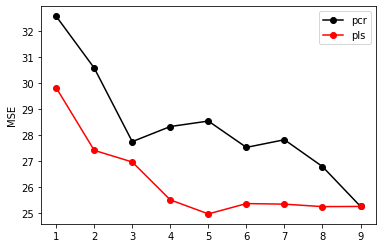

In [384]:
plt.figure(1)
plt.plot(np.arange(1, len(pcr_list)+1, 1), pcr_list, 'ko-', label='pcr')
plt.plot(np.arange(1, len(pls_list)+1, 1), pls_list, 'ro-', label='pls')
plt.legend()
plt.ylabel('MSE')
#appears to me that a 6 variable model will work just fine for ridge 
for i, j in zip(pls_list, pcr_list):
    print(i,j)


In [338]:
pcr.named_steps

{'standardscaler': StandardScaler(),
 'pca': PCA(n_components=1),
 'linearregression': LinearRegression()}

In [386]:
#Linear - ['zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'lstat'] 22.8524382606039
#Ridge - ['zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'lstat'] 22.870406948214466
#Lasso - does zero out some variables; 25.021909253246104
#PCR - 24.97 at 5 principle components! not bad, but not as good as Linear and ridge.
#pls - 26+ at best

(c) Does your chosen model involve all of the features in the data
set? Why or why not